In [203]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# I. Data Exploration

## 1. Campaigns

In [204]:
campaigns_df = pd.read_csv(os.path.join('dataset', 'actual', 'Campaigns.csv'))

campaigns_df.head(n=1)

,id,name,status,numOfLeads,numOfInvitesSent,numOfInvitesAccepted,numOfRepliesReceived,userId,useFirstName,deleted,...,secondFollowUpsSent,invitesWithdrawn,createdAt,updatedAt,thirdFollowUpsSent,fourthFollowUpsSent,fifthFollowUpsSent,sixthFollowUpsSent,type,useScraperAccounts
0,169,Jennings-Scott Walker-Molina,STOPPED,0,0,0,0,4,f,f,...,0,0,2023-09-29 14:34:46.105+00,2023-10-04 08:01:25.656+00,0,0,0,0,EmailTargetMarket,t


In [205]:
print(campaigns_df.info())
print(campaigns_df.describe())
print(campaigns_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       146 non-null    int64 
 1   name                     146 non-null    object
 2   status                   146 non-null    object
 3   numOfLeads               146 non-null    int64 
 4   numOfInvitesSent         146 non-null    int64 
 5   numOfInvitesAccepted     146 non-null    int64 
 6   numOfRepliesReceived     146 non-null    int64 
 7   userId                   146 non-null    int64 
 8   useFirstName             146 non-null    object
 9   deleted                  146 non-null    object
 10  lastScheduledToScrapeAt  128 non-null    object
 11  minimumInvites           146 non-null    int64 
 12  maximumInvites           146 non-null    int64 
 13  firstFollowUpsSent       146 non-null    int64 
 14  secondFollowUpsSent      146 non-null    i

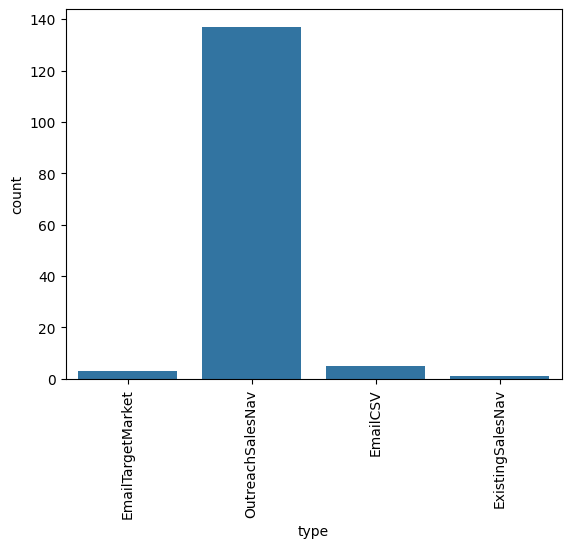

In [206]:
sns.countplot(x='type', data=campaigns_df)
plt.xticks(rotation=90) # type names are a bit long
plt.show()

The plot above shows that the highest amounts of campaigns is of type `OutreachSalesNav`.
We will only consider that and ignore the rest.

## 2. Leads

In [207]:
leads_df = pd.read_csv(os.path.join('dataset', 'actual', 'Leads.csv'))

leads_df.head(n=1)

/tmp/ipykernel_318308/881938342.py:1: DtypeWarning: Columns (23,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  leads_df = pd.read_csv(os.path.join('dataset', 'actual', 'Leads.csv'))


,id,userId,campaignId,name,firstName,lastName,gender,email,companyName,title,...,fifthFollowUpSentAt,sixthFollowUpSentAt,emailFollowUpThreadId,firstEmailFollowUpSentAt,secondEmailFollowUpSentAt,existingMessagesCount,inviteAttempts,skip,cdsEmployeeId,skipReason
0,42882,4,150,Tyrus Parker,Angella,Zemlak,male,ab@alexbetz.de,PATRIZIA AG,-,...,NaN,NaN,NaN,NaN,NaN,NaN,0,f,NaN,NaN


In [208]:
print(leads_df.info())
print(leads_df.describe())
print(leads_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59609 entries, 0 to 59608
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         59609 non-null  int64  
 1   userId                     59609 non-null  int64  
 2   campaignId                 59609 non-null  int64  
 3   name                       59609 non-null  object 
 4   firstName                  59609 non-null  object 
 5   lastName                   59609 non-null  object 
 6   gender                     59609 non-null  object 
 7   email                      39686 non-null  object 
 8   companyName                59609 non-null  object 
 9   title                      59609 non-null  object 
 10  city                       59609 non-null  object 
 11  country                    59609 non-null  object 
 12  location                   59609 non-null  object 
 13  inviteSentAt               42112 non-null  obj

## 3. Messages

In [209]:
messages_df = pd.read_csv(os.path.join('dataset', 'actual', 'Messages.csv'))

messages_df.head(n=1)

,order,campaignId,name,content,maleSalutation,femaleSalutation,interval,createdAt,updatedAt,type
0,0,124,Initial contact message,{{ salutation }} {{ first_name }}\nin den aktu...,Moin,Moin,NaN,2023-02-01 14:47:41.448+00,2023-02-01 14:47:41.448+00,LINKEDIN


In [210]:
print(messages_df.info())
print(messages_df.describe())
print(messages_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order             434 non-null    int64  
 1   campaignId        434 non-null    int64  
 2   name              434 non-null    object 
 3   content           434 non-null    object 
 4   maleSalutation    364 non-null    object 
 5   femaleSalutation  364 non-null    object 
 6   interval          282 non-null    float64
 7   createdAt         434 non-null    object 
 8   updatedAt         434 non-null    object 
 9   type              434 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 34.0+ KB
None
            order  campaignId    interval
count  434.000000  434.000000  282.000000
mean     1.126728   93.029954    4.141844
std      1.078908   48.827325    6.520792
min      0.000000    1.000000    1.000000
25%      0.000000   54.250000    1.000000
50%      1.

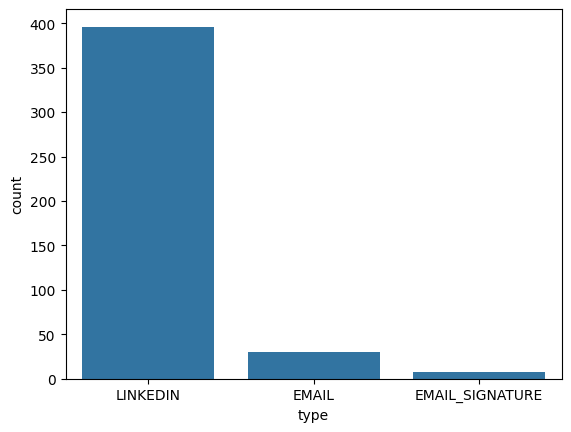

In [211]:
sns.countplot(x='type', data=messages_df)
plt.show()

The email type messages are for the email campaigns and should be dropped.

The `LinkedIn` type messages are from our `OutreachSalesNav` but some of them can also be from the `ExistingSalesNav`. A cleanup is needed to only keep messages for the campaigns
that are not dropped.

## 4. Records

In [212]:
records_df = pd.read_csv(os.path.join('dataset', 'actual', 'Records.csv'))

records_df.head(n=1)

,id,campaignId,userId,status,numOfInvitesSent,numOfInvitesAccepted,numOfRepliesReceived,firstFollowUpsSent,secondFollowUpsSent,invitesWithdrawn,minimumInvites,maximumInvites,createdAt,updatedAt,thirdFollowUpsSent,fourthFollowUpsSent,fifthFollowUpsSent,sixthFollowUpsSent
0,1,54,4,ACTIVE,507,124,68,32,14,117,8,14,2022-05-09 19:00:00.226+00,2022-05-09 19:00:00.226+00,0,0,0,0


In [213]:
print(records_df.info())
print(records_df.describe())
print(records_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63638 entries, 0 to 63637
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    63638 non-null  int64 
 1   campaignId            63638 non-null  int64 
 2   userId                63638 non-null  int64 
 3   status                63638 non-null  object
 4   numOfInvitesSent      63638 non-null  int64 
 5   numOfInvitesAccepted  63638 non-null  int64 
 6   numOfRepliesReceived  63638 non-null  int64 
 7   firstFollowUpsSent    63638 non-null  int64 
 8   secondFollowUpsSent   63638 non-null  int64 
 9   invitesWithdrawn      63638 non-null  int64 
 10  minimumInvites        63638 non-null  int64 
 11  maximumInvites        63638 non-null  int64 
 12  createdAt             63638 non-null  object
 13  updatedAt             63638 non-null  object
 14  thirdFollowUpsSent    63638 non-null  int64 
 15  fourthFollowUpsSent   63638 non-null

## 5. Users

In [214]:
users_df = pd.read_csv(os.path.join('dataset', 'actual', 'Users.csv'))

users_df.head(n=1)

,id,companyName,email,role,userBoughtCredit,userUsedCredit,createdAt,updatedAt
0,57,"Stone, Fitzgerald and Aguilar",kimberlyjohnson@kirk.net,User,1000,572,2022-11-23 11:02:44.495+00,2023-05-15 11:53:02.237+00


In [215]:
print(users_df.info())
print(users_df.describe())
print(users_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                37 non-null     int64 
 1   companyName       37 non-null     object
 2   email             37 non-null     object
 3   role              37 non-null     object
 4   userBoughtCredit  37 non-null     int64 
 5   userUsedCredit    37 non-null     int64 
 6   createdAt         37 non-null     object
 7   updatedAt         37 non-null     object
dtypes: int64(3), object(5)
memory usage: 2.4+ KB
None
              id  userBoughtCredit  userUsedCredit
count  37.000000         37.000000       37.000000
mean   28.729730       1728.432432     1130.837838
std    19.309826       1854.242831     1603.913106
min     4.000000        500.000000        0.000000
25%    13.000000       1000.000000      407.000000
50%    25.000000       1000.000000      635.000000
75%    34.000000       165

# II. Data Preprocessing

## 1. Campaigns

### a. Cleaning

In [216]:
# Only consider the type "OutreachSalesNav" for campaigns
campaigns_df = campaigns_df[campaigns_df['type'] == 'OutreachSalesNav']

In [217]:
campaigns_df = campaigns_df.drop(
    [
        # "id", this is needed since the relationship between the campaigns and the leads is based on this column
        "status",
        "name",
        "type", # only consider the type "OutreachSalesNav"
        "useFirstName", # deprecated, using the Message table instead
        "useScraperAccounts", # scraper related
        "userId",
        "deleted",
        "lastScheduledToScrapeAt", # scraper related
        "createdAt",
        "updatedAt",
    ],
    axis=1,
    errors="ignore",
)

### b. Processing

In [218]:
# Looks like there is nothing to do here
print(campaigns_df.info())
campaigns_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 145
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id                    137 non-null    int64
 1   numOfLeads            137 non-null    int64
 2   numOfInvitesSent      137 non-null    int64
 3   numOfInvitesAccepted  137 non-null    int64
 4   numOfRepliesReceived  137 non-null    int64
 5   minimumInvites        137 non-null    int64
 6   maximumInvites        137 non-null    int64
 7   firstFollowUpsSent    137 non-null    int64
 8   secondFollowUpsSent   137 non-null    int64
 9   invitesWithdrawn      137 non-null    int64
 10  thirdFollowUpsSent    137 non-null    int64
 11  fourthFollowUpsSent   137 non-null    int64
 12  fifthFollowUpsSent    137 non-null    int64
 13  sixthFollowUpsSent    137 non-null    int64
dtypes: int64(14)
memory usage: 16.1 KB
None


,id,numOfLeads,numOfInvitesSent,numOfInvitesAccepted,numOfRepliesReceived,minimumInvites,maximumInvites,firstFollowUpsSent,secondFollowUpsSent,invitesWithdrawn,thirdFollowUpsSent,fourthFollowUpsSent,fifthFollowUpsSent,sixthFollowUpsSent
1,19,904,110,171,95,1,5,35,29,89,0,0,0,0
2,113,40266,2596,672,129,9,15,588,0,1480,0,0,0,0
3,104,163,166,74,38,3,6,25,10,145,0,0,0,0
4,76,635,533,45,19,3,6,38,32,467,0,0,0,0
5,124,0,0,0,0,3,8,0,0,0,0,0,0,0


## 2. Leads

### a. Cleaning

In [219]:
# Delete the leads that never received an invite
# leads_df = leads_df.dropna(subset=['inviteSentAt'])1

# We do not want to delete such leads, since this is the kind of data we want to predict

In [220]:
leads_df = leads_df.drop(
    [
        # "campaignId", this is needed since the relationship between the campaigns and the leads is based on this column
        # "id", needed for the final merge
        "userId",
        "name",
        "firstName",
        "lastName",
        "companyName",
        "email",
        "createdAt",
        "updatedAt",
        "emailFollowUpThreadId", # related to email campaign
        "firstEmailFollowUpSentAt", # related to email campaign
        "secondEmailFollowUpSentAt", # related to email campaign
        "cdsEmployeeId", # related to email campaign
        "skipReason",
        "existingMessagesCount", # related to another campaign type
        "inviteAttempts", # not relevant
        "skip", # already cleaned by dropping the rows with no inviteSentAt
        "sixthFollowUpSentAt", # this is almost never reachable, leads reply within 5 follow ups (null in the dataset)
    ],
    axis=1,
    errors="ignore",
)

# print(leads_df.info())

### b. Processing

In [221]:
# Transforming to boolean columns where applicable (null = False, not null = True)
column_name_mapping = {
    "inviteSentAt": "isInviteSent",
    "inviteAccepted": "isInviteAccepted",
    "inviteWithdrawnAt": "isInviteWithdrawn",
    "firstFollowUpSentAt": "isFirstFollowUpSent",
    "secondFollowUpSentAt": "isSecondFollowUpSent",
    "replied": "isReplied",
    "thirdFollowUpSentAt": "isThirdFollowUpSent",
    "fourthFollowUpSentAt": "isFourthFollowUpSent",
    "fifthFollowUpSentAt": "isFifthFollowUpSent",
}

for old_name, new_name in column_name_mapping.items():
    leads_df[new_name] = ~leads_df[old_name].isnull()

leads_df = leads_df.drop(column_name_mapping.keys(), axis=1) # type: ignore # safe to ignore, since the keys are the same as the columns

In [222]:
# Rename some columns for clarity
leads_df = leads_df.rename(columns={"id": "leadId"})
leads_df = leads_df.rename(columns={"title": "position"})

In [223]:
# Encode the genre with one-hot encoding
leads_df = pd.get_dummies(leads_df, columns=['gender'])

In [224]:
# Encode the other categorical columns with label encoding
label_encoder = LabelEncoder()
categorical_columns = ['position', 'city', 'country', 'location']
for column in categorical_columns:
    leads_df[column] = label_encoder.fit_transform(leads_df[column])

del label_encoder, categorical_columns

In [225]:
print(leads_df.info())
leads_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59609 entries, 0 to 59608
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   leadId                59609 non-null  int64
 1   campaignId            59609 non-null  int64
 2   position              59609 non-null  int64
 3   city                  59609 non-null  int64
 4   country               59609 non-null  int64
 5   location              59609 non-null  int64
 6   isInviteSent          59609 non-null  bool 
 7   isInviteAccepted      59609 non-null  bool 
 8   isInviteWithdrawn     59609 non-null  bool 
 9   isFirstFollowUpSent   59609 non-null  bool 
 10  isSecondFollowUpSent  59609 non-null  bool 
 11  isReplied             59609 non-null  bool 
 12  isThirdFollowUpSent   59609 non-null  bool 
 13  isFourthFollowUpSent  59609 non-null  bool 
 14  isFifthFollowUpSent   59609 non-null  bool 
 15  gender_female         59609 non-null  bool 
 16  gend

,leadId,campaignId,position,city,country,location,isInviteSent,isInviteAccepted,isInviteWithdrawn,isFirstFollowUpSent,isSecondFollowUpSent,isReplied,isThirdFollowUpSent,isFourthFollowUpSent,isFifthFollowUpSent,gender_female,gender_male
0,42882,150,53,0,0,4140,False,True,False,False,False,True,False,False,False,False,True
1,43056,150,53,0,0,1572,False,True,False,False,False,True,False,False,False,False,True
2,43059,150,53,0,0,5239,False,True,False,False,False,True,False,False,False,False,True
3,43066,150,53,0,0,2163,False,True,False,False,False,True,False,False,False,False,True
4,43199,150,53,0,0,6394,False,True,False,False,False,True,False,False,False,False,True


## 3. Messages

### a. Cleaning

In [226]:
# Only keep LinkedIn type messages
messages_df = messages_df[messages_df['type'] == 'LINKEDIN']

In [227]:
# Delete all messages not related to any campaign
messages_df = messages_df[messages_df['campaignId'].isin(campaigns_df['id'])]

In [228]:
# Delete unnecessary columns
messages_df = messages_df.drop(
    [
        # "campaignId", this is needed since the relationship between the campaigns and the leads is based on this column
        "type", # type is always "LINKEDIN" here
        "createdAt",
        "updatedAt",
    ],
    axis=1,
    errors="ignore",
)

# print(messages_df.info())

### b. Processing

In [229]:
# Set all null intervals to 0 (always the case for initial messages or invites)
messages_df['interval'] = messages_df['interval'].fillna(0)
messages_df['interval'] = messages_df['interval'].astype(int)

In [230]:
# Create a new `messageId` out of the `order` and `campaignId` columns. Both are numeric
messages_df['messageId'] = messages_df['order'].astype(str) + "-" + messages_df['campaignId'].astype(str)

In [231]:
# Label encoding for categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['name', 'content', 'maleSalutation', 'femaleSalutation']

for column in categorical_columns:
    messages_df[column] = label_encoder.fit_transform(messages_df[column].astype(str))

del label_encoder, categorical_columns

In [232]:
print(messages_df.info())
messages_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 0 to 433
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order             393 non-null    int64 
 1   campaignId        393 non-null    int64 
 2   name              393 non-null    int64 
 3   content           393 non-null    int64 
 4   maleSalutation    393 non-null    int64 
 5   femaleSalutation  393 non-null    int64 
 6   interval          393 non-null    int64 
 7   messageId         393 non-null    object
dtypes: int64(7), object(1)
memory usage: 27.6+ KB
None


,order,campaignId,name,content,maleSalutation,femaleSalutation,interval,messageId
0,0,124,5,59,18,20,0,0-124
1,0,108,5,34,23,25,0,0-108
2,1,134,0,46,23,25,1,1-134
3,2,134,1,1,23,25,5,2-134
4,3,134,2,45,23,25,7,3-134


The main purpose of the combined `messageId` is for the purpose of creating the `user-item` matrix and does not necessarily need to be used as a feature, hence why it's not in numeric format.

## 4. Records

Nothing to do here at the moment since the campaign includes the final records

In [233]:
del records_df

## 5. Users

Table does not have any impact on the data

In [234]:
del users_df

# III. Model Selection

This can be approached in multiple ways:
- As a recommendation problem, where the ideal message should be sent to a lead to increase their conversion probability.
- An an NLP (Natural Language Processing) problem where new messages should be generated to increase the conversion rate for a specific campaign.

In this context, we will address this as a recommendation problem without any peculiar reason, which means that this can be solved using methods such as:
- Collaborative Filtering
  - User-based or item-based collaborative filtering.
  - Matrix factorization methods like Singular Value Decomposition (SVD) or Alternating Least Squares (ALS).
  - This method os suitable if we have a large number of leads with sufficient interaction data (responses to messages).
  - Example, if `Lead A` and `Lead B` have responded to similar messages in the past, and `Lead A` responds to a new message, then that messages can be recommended to `Lead B`.
- Content-based recommendation
  - Utilize message content and lead features to recommend messages.
  - This works very well if we have detailed information (message subject, length, sentiment, etc.) or if we have detailed information about the lead (job, past response behavior, etc.) which we have to a very small degree.
- Association rules
  - A rule-based method for discovering interesting relationship that works very well with a large number of transactions
  - That's what we don't have in our case.

Below, we do an attempt using **collaborative filtering**.

## 1. Feature engineering

Let's create a user-item interaction matrix where each _row represents a lead_, each _column represents a message_, and each _value represents whether the lead responded_ to the message.

In [235]:
# Merge the dataframes
data = pd.merge(leads_df, messages_df, on='campaignId')
data = pd.merge(data, campaigns_df, left_on='campaignId', right_on='id')

In [236]:
# Create the matrix
user_item_matrix = pd.pivot_table(data, index='leadId', columns='messageId', values='isReplied')

# Fill NaNs with 0
user_item_matrix = user_item_matrix.fillna(0)

# Transform to int
user_item_matrix = user_item_matrix.astype(int)

# Rename leadId to user_id
user_item_matrix.index.names = ['user_id']

In [237]:
# Delete rogue data
del data

In [238]:
print(user_item_matrix.info())
user_item_matrix.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 50024 entries, 1 to 58617
Columns: 366 entries, 0-1 to 5-142
dtypes: int64(366)
memory usage: 140.1 MB
None


messageId,0-1,0-100,0-101,0-102,0-103,0-104,0-107,0-108,0-109,0-11,...,4-139,4-140,4-142,4-143,4-145,4-148,4-165,4-167,5-139,5-142
user_id,,,,,,,,,,,,,,,,,,,,,
58613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
58614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
58615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
58616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
58617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


If we take row the first row above, we can interpret it as follows:
> The lead with the id of 58613 has replied to the fourth follow up message of the campaign with the id of 167.

# IV. Model Training & Evaluation

Attempt to find the best number of dimensions to reduce the user-item matrix to.
This helps extracting the most important features for predicting lead conversions.
The best number of dimensions is the one that captures the most information, as measured by the explained variance ration.

`TruncatedSVD` stands for Truncated Singular Value Decomposition. It is a dimensionality reduction technique.

In the context of recommendation systems (such as the case here), `TruncatedSVD` is used to discover latent features in the user-item matrix. The aformentioned latent features are used to make recommendations.


For example, if we have a user-item matrix where the entries represent movie ratings, `TruncatedSVD` might discover that some of the latent features correspond to specific genres, and it can then use these features to recommend movies of a specific genre to a user.

In [239]:
X_train, X_test = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

This was going to originally use the `GridSearchCV` but it is primarily designed for supervised learning algorithms.
As a workaround, the grid search is performed manually.

In [240]:
# Left here for documentation purposes
# from sklearn.metrics import make_scorer
# from sklearn.model_selection import GridSearchCV

# model = TruncatedSVD(
#     random_state=42
#     # n_components is the hyperparameter we want to tune
# )

# # Define the grid of hyperparameters to search
# hyperparameter_grid = {"n_components": [10, 50, 100, 200]}


# # Define a custom scoring function
# # Needed because the default scoring function is not supported for TruncatedSVD (unsupervised learning algorithm)
# def explained_variance_scorer(estimator, X_train, Y_train):
#     print("Explained variance ratio: ", estimator.fit(X_train).explained_variance_ratio_)
#     return estimator.fit(X_train).explained_variance_ratio_.sum()


# # Create a scorer using the custom scoring function
# scorer = make_scorer(explained_variance_scorer, greater_is_better=True)

# # Set up the grid search with 'explained_variance' as the scoring metric
# grid_cv = GridSearchCV(model, hyperparameter_grid, scoring=scorer, cv=5, refit=False)

# # Fit the grid search
# grid_cv.fit(X_train)

# # Get the best parameters
# best_params = grid_cv.best_params_

# # Manually refit the model with the best parameters
# best_model = TruncatedSVD(n_components=best_params["n_components"], random_state=42)
# best_model.fit(X_train)

In [241]:
# The hyperparameter grid to search
hyperparameter_grid = {"n_components": [50, 100, 250, 300, 342]}

# Initialize the best_score to a low value
best_score = -1
best_model = TruncatedSVD(n_components=10, random_state=42)

# Iterate over all hyperparameters and find the best_score
for n_components in hyperparameter_grid["n_components"]:
    # Create and refit the model
    model = TruncatedSVD(n_components=n_components, random_state=42)
    model.fit(X_train)

    score = model.explained_variance_ratio_.sum()

    print(f"n_components: {n_components}, score: {score}")

    # Get the best model based on the score
    if score > best_score:
        best_score = score
        best_model = model

print("Best hyperparameters: ", best_model.get_params())
print("Explained variance ratio: ", best_score)

best_model

n_components: 50, score: 0.7544168346667408
n_components: 100, score: 0.9859186594745364
n_components: 250, score: 1.0000000000000402
n_components: 300, score: 1.0000000000000469
n_components: 342, score: 1.0000000000000424
Best hyperparameters:  {'algorithm': 'randomized', 'n_components': 300, 'n_iter': 5, 'n_oversamples': 10, 'power_iteration_normalizer': 'auto', 'random_state': 42, 'tol': 0.0}
Explained variance ratio:  1.0000000000000469


TruncatedSVD(n_components=300, random_state=42)

# V. Interpretation

## 1. Feature important & model explanation

- **Latent Features:**
  The `n_components` represent latent features derived from the user-item matrix. They capture the underlying pattern in the data.
  In our case, it represents a certain type of interaction pattern between leads and messages.
- **Explained Variance Ratio:**
  This explains how much information can be attributed to each of the latent features. The higher the value, the more important the feature is.
- **Model Explanation:**
  The created latent features do not directly correspond to the original features in the data. The transformed user-item matrix `best_model.transform(X)` can be used to see how each lead is represented in terms of latent features.

In [242]:
index_to_message_id = {i: message_id for i, message_id in enumerate(messages_df['messageId'])}

## **Example:** An already converted lead

Below, we try to check the ideal message of **what should have been sent to a lead** that already converted, meaning that `isReplied` is `true`.
This has no business use, but just for demonstration purposes.

In [243]:
lead_id = leads_df[leads_df['isReplied']].sample().index[0]

- Find the recommended messages' indices

In [244]:
# Transform the user-item matrix
transformed_matrix = best_model.transform(user_item_matrix)

# Get the user vector
user_vector = transformed_matrix[lead_id, :]

# Compute the scores for each item by multiplying the user vector with the item matrix
scores = np.dot(user_vector, best_model.components_)

# Get the indices of the items sorted by their score in descending order
recommended_item_indices = np.argsort(scores)[::-1]

- Map to the actual messages

In [245]:
# Get the recommended message ids
recommended_message_ids = [index_to_message_id[index] for index in recommended_item_indices]

# Filter the messages df to only include the recommended message ids
recommended_messages = messages_df[messages_df['messageId'].isin(recommended_message_ids)]

# Group by 'order' and keep only the first message for each order (this is an application specific logic)
recommended_messages = recommended_messages.groupby('order').first().reset_index()

# Show the recommended messages
recommended_messages

,order,campaignId,name,content,maleSalutation,femaleSalutation,interval,messageId
0,0,124,5,59,18,20,0,0-124
1,1,134,0,46,23,25,1,1-134
2,2,134,1,1,23,25,5,2-134
3,3,134,2,45,23,25,7,3-134
4,4,134,3,20,23,25,14,4-134
5,5,139,4,341,3,5,45,5-139


With this, we can simply lookup the actual messages' content before the encoding.

## **Example:** A lead with no messages sent

Now we do the same but for a lead that still was not contacted yet. Meaning that the `inviteSentAt` is `false`.
This is the answer to the problematic.

In [246]:
lead_id = leads_df[leads_df['isInviteSent']].sample().index[0]

- Find the recommended messages' indices

In [247]:
transformed_matrix = best_model.transform(user_item_matrix)
user_vector = transformed_matrix[lead_id, :]
scores = np.dot(user_vector, best_model.components_)
recommended_item_indices = np.argsort(scores)[::-1]

- Map to the actual messages

In [248]:
recommended_message_ids = [index_to_message_id[index] for index in recommended_item_indices]
recommended_messages = messages_df[messages_df['messageId'].isin(recommended_message_ids)]
recommended_messages = recommended_messages.groupby('order').first().reset_index()
recommended_messages

,order,campaignId,name,content,maleSalutation,femaleSalutation,interval,messageId
0,0,124,5,59,18,20,0,0-124
1,1,134,0,46,23,25,1,1-134
2,2,134,1,1,23,25,5,2-134
3,3,134,2,45,23,25,7,3-134
4,4,134,3,20,23,25,14,4-134
5,5,139,4,341,3,5,45,5-139


TODO:

- Deployment
- Documentation
- Presentation